In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(X_train, _), (_, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.0


11490434/11490434 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras import layers, models

# Generator network
def build_generator(latent_dim):
    model = models.Sequential()
    model.add(layers.Dense(128, input_dim=latent_dim))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(28*28, activation='sigmoid'))
    model.add(layers.Reshape((28, 28)))
    return model

# Discriminator network
def build_discriminator(input_shape):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model


In [3]:
# GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = models.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Create instances of generator, discriminator, and GAN
latent_dim = 100
generator = build_generator(latent_dim)
discriminator = build_discriminator((28, 28))
gan = build_gan(generator, discriminator)


In [6]:
# Compile discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

# Compile GAN
gan.compile(optimizer='adam', loss='binary_crossentropy')


In [8]:
import numpy as np
def train_gan(generator, discriminator, gan, X_train, latent_dim, n_epochs=50, batch_size=128):
    for epoch in range(n_epochs):
        for i in range(X_train.shape[0] // batch_size):
            # Train discriminator
            noise = tf.random.normal((batch_size, latent_dim))
            fake_images = generator.predict(noise)
            real_images = X_train[np.random.randint(0, X_train.shape[0], batch_size)]
            X = np.concatenate((real_images, fake_images))
            y = np.concatenate((np.ones((batch_size, 1)), np.zeros((batch_size, 1))))
            discriminator_loss = discriminator.train_on_batch(X, y)

            # Train generator
            noise = tf.random.normal((batch_size, latent_dim))
            y = np.ones((batch_size, 1))
            generator_loss = gan.train_on_batch(noise, y)

            print(f'Epoch {epoch+1}/{n_epochs}, Step {i+1}/{X_train.shape[0]//batch_size}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}')

# Train GAN
train_gan(generator, discriminator, gan, X_train, latent_dim)


Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 3ms/step
Epoch 45/50, Step 309/468, Discriminator Loss: 8.263030052185059, Generator Loss: 1.1893029494558505e-07
4/4 [==============================] - 0s 3ms/step
Epoch 45/50, Step 310/468, Discriminator Loss: 8.251571655273438, Generator Loss: 1.2139119576204394e-07
4/4 [==============================] - 0s 3ms/step
Epoch 45/50, Step 311/468, Discriminator Loss: 8.263072967529297, Generator Loss: 1.2122021075811062e-07
4/4 [==============================] - 0s 4ms/step
Epoch 45/50, Step 312/468, Discriminator Loss: 8.25485897064209, Generator Loss: 1.2035351915073988e-07
4/4 [==============================] - 0s 4ms/step
Epoch 45/50, Step 313/468, Discriminator Loss: 8.258406639099121, Generator Loss: 1.2112572278510925e-07
4/4 [==============================] - 0s 4ms/step
Epoch 45/50, Step 314/468, Discriminator Loss: 8.258066177368164, Generator Loss: 1.2042562502756482e-07
4/4 [=========

1/1 [==============================] - 0s 84ms/step


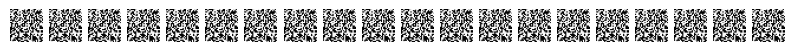

In [11]:
import matplotlib.pyplot as plt

def generate_digits(generator, latent_dim, n_samples=10):
    noise = tf.random.normal((n_samples, latent_dim))
    generated_digits = generator.predict(noise)
    plt.figure(figsize=(10, 2))
    for i in range(n_samples):
        plt.subplot(1, n_samples, i+1)
        plt.imshow(generated_digits[i], cmap='gray')
        plt.axis('off')
    plt.show()

# Generate more synthetic digits (e.g., 20 samples)
generate_digits(generator, latent_dim, n_samples=20)


1/1 [==============================] - 0s 31ms/step


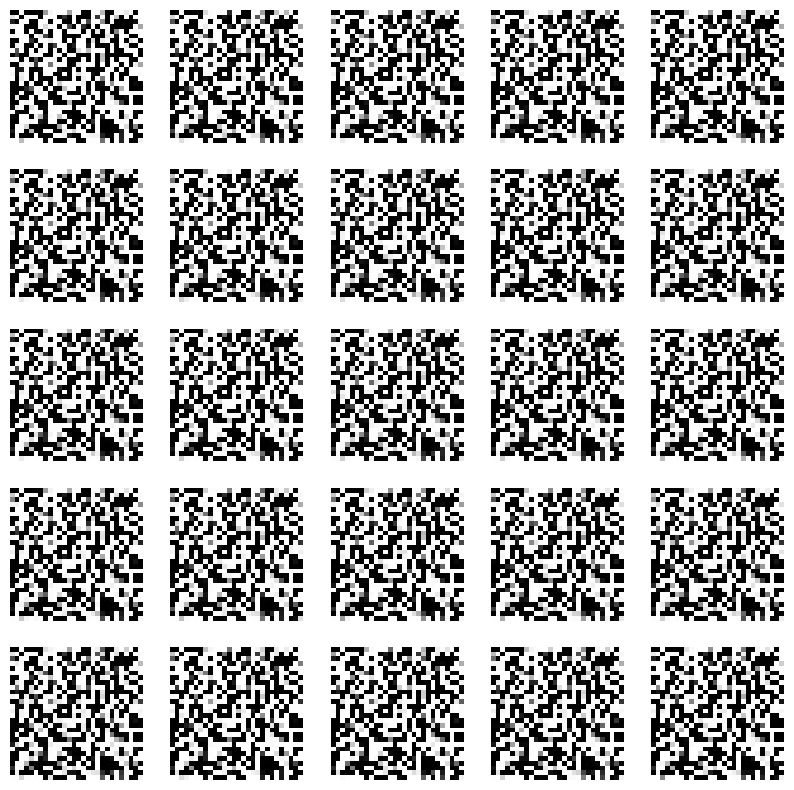

In [17]:
import matplotlib.pyplot as plt

def visualize_generated_digits(generator, latent_dim, n_rows=5, n_cols=5, figsize=(10, 10)):
    # Generate synthetic digits
    noise = tf.random.normal((n_rows * n_cols, latent_dim))
    generated_digits = generator.predict(noise)

    # Plot the generated digits
    plt.figure(figsize=figsize)
    for i in range(n_rows * n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(generated_digits[i], cmap='gray')
        plt.axis('off')
    plt.show()

# Call the function to visualize generated digits
visualize_generated_digits(generator, latent_dim)


32/32 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


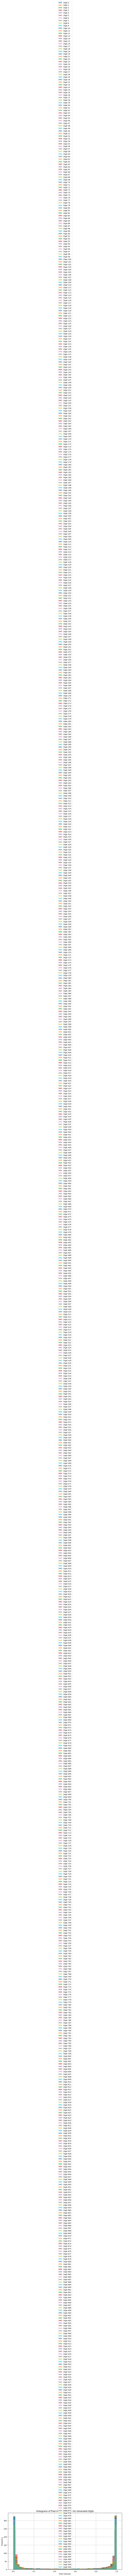

In [18]:
import matplotlib.pyplot as plt

def plot_pixel_intensity_histograms(generator, latent_dim, n_samples=1000):
    # Generate synthetic digits
    noise = tf.random.normal((n_samples, latent_dim))
    generated_digits = generator.predict(noise)

    # Plot histograms of pixel intensity values
    plt.figure(figsize=(12, 6))
    for i in range(generated_digits.shape[0]):
        plt.hist(generated_digits[i].flatten(), bins=50, alpha=0.5, label=f'Digit {i}')
    plt.title('Histograms of Pixel Intensity Values for Generated Digits')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to plot histograms of pixel intensity values
plot_pixel_intensity_histograms(generator, latent_dim)
